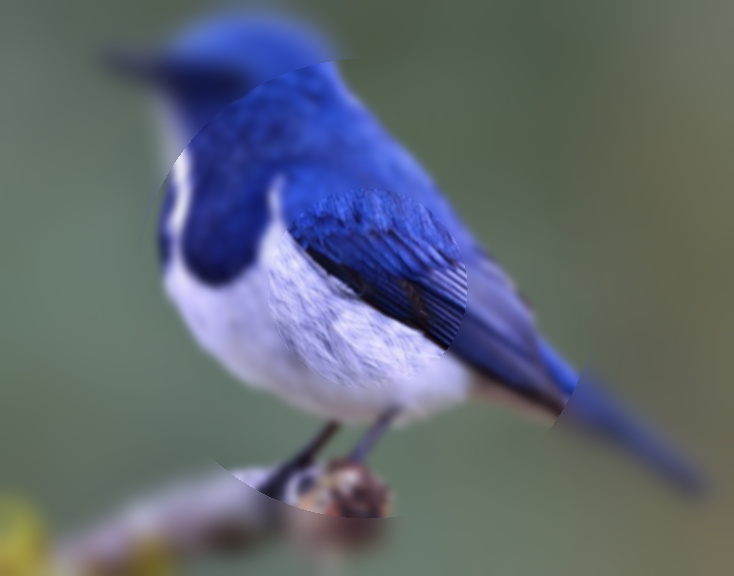

In [1]:
import random
from PIL import Image, ImageDraw, ImageFilter
import numpy as np
import cv2
import sys, os
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../')))
from base.inpating_data import RandomCircularBlur,CompleteBlur,ScaleCircularBlur,DynamicBlur,Saliency
os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7890'
os.environ['http_proxy'] = 'http://127.0.0.1:7890'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7890'
os.environ['https_proxy'] = 'http://127.0.0.1:7890'
image_path = 'figures/bird.jpg'
img = Image.open(image_path)
img_np = np.array(img)
# T = CompleteBlur(41)
T = ScaleCircularBlur()
# T = DynamicBlur()
# T = Saliency()
img_results = T(img_np)
img =Image.fromarray(img_results)
img.save("figures/bird_blur.png")
img

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 10),dpi=400)
axes = axes.flatten()  # 将 2D 数组展平为 1D 数组

# 遍历值 15 到 50，间隔为 5
for i, radius in enumerate(range(20, 66, 5)):
    T = CompleteBlur(radius)  # 创建模糊对象
    img_results = T(img_np)   # 应用模糊处理

    # 在子图中显示结果
    axes[i].imshow(img_results)
    axes[i].set_title(f'Blur Radius: {radius}')
    axes[i].axis('off')  # 不显示坐标轴

# 调整布局并显示
plt.tight_layout()
plt.show()

In [ ]:


# 加载图像
image = cv2.imread('llama_07s.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 创建 Fine Grained Static Saliency 对象
saliency = cv2.saliency.StaticSaliencyFineGrained_create()

# 计算显著性图
(success, saliency_map) = saliency.computeSaliency(image)

# 转换显著性图到 0~255 之间的灰度图
saliency_map = (saliency_map * 255).astype("uint8")

# 显示原始图像和显著性图
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(saliency_map, cmap='gray')
plt.title('Saliency Map (Fine Grained)')
plt.axis('off')

plt.show()


In [ ]:

# 读取图片
image_path = 'llama_07s.jpg'  # 替换为你的图片路径
img = Image.open(image_path)

# 将图片转换为 NumPy 数组
img_np = np.array(img)
img_result = Image.fromarray(img_np)
img_result.save('llama_07s.pdf', 'PDF')
# 图片尺寸
height, width, _ = img_np.shape

T = ScaleCircularBlur()
r = T(img_np)
r = Image.fromarray(r)
r.save('blurred_llama_07s.pdf', 'PDF')
r

In [ ]:
import random
from PIL import Image, ImageDraw, ImageFilter
import numpy as np
import cv2
import sys, os
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../')))
from base.inpating_data import RandomCircularBlur,CompleteBlur,ScaleCircularBlur,DynamicBlur
os.environ['HTTP_PROXY'] = 'http://127.0.0.1:7890'
os.environ['http_proxy'] = 'http://127.0.0.1:7890'
os.environ['HTTPS_PROXY'] = 'http://127.0.0.1:7890'
os.environ['https_proxy'] = 'http://127.0.0.1:7890'
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, transform, color

# from data_loader import RescaleT, ToTensor, ToTensorLab

from base.u2net import U2NET
from base.utils import RescaleT,ToTensorLab

def normPRED(d):
    ma = torch.max(d)
    mi = torch.min(d)
    dn = (d-mi)/(ma-mi)
    return dn


model = U2NET(3,1)
model_path = '/home/wht/multimodal_brain/src/tasks/exp/u2net/u2net.pth'
model.load_state_dict(torch.load(model_path))
model.cuda()
model.eval()

T=transforms.Compose([RescaleT(320),ToTensorLab(flag=0)])
image_path = 'llama_07s.jpg' 
# img = io.imread(image_path)
img = np.array(Image.open(image_path))
img =  T(img).unsqueeze(0)
img = img.cuda()
print(img.shape)
d1,d2,d3,d4,d5,d6,d7= model(img)
# normalization
pred = d1[:,0,:,:]
pred = normPRED(pred)
pred.shape

predict = pred
predict = predict.squeeze()
predict_np = predict.cpu().data.numpy()

im = Image.fromarray(predict_np*255).convert('RGB')

image_name = 'llama_07s.jpg'
img_name = image_name.split(os.sep)[-1]
image = io.imread(image_name)
imo = im.resize((image.shape[1],image.shape[0]),resample=Image.BILINEAR)

pb_np = np.array(imo)


imo.save('llama_07s_Saliency_Map.png')

In [ ]:
img = np.array(Image.open(image_path))
img.shape

In [ ]:
image.shape

In [ ]:
pb_np[:,:,0].shape
binary_matrix = np.where(pb_np[:,:,0] > 127, 1, 0)
plt.imshow(binary_matrix, cmap='gray')
plt.title("Binary Matrix")
plt.show()

In [ ]:
blur_kernel_size_outer = 21
img_np = np.array(Image.open(image_path))
img_blur = cv2.GaussianBlur(img_np, (blur_kernel_size_outer, blur_kernel_size_outer), 0)

img_result = img_blur.copy()
img_result[binary_matrix == 1] = img_np[binary_matrix == 1]

Image.fromarray(img_result)

In [ ]:
hist, bins = np.histogram(pb_np, bins=256, range=(0, 255))

# 打印分布结果
print("Histogram:", hist)
print("Bins:", bins)
plt.figure(figsize=(8, 6))
plt.bar(bins[:-1], hist, width=1, edgecolor='black')
plt.title("Pixel Value Distribution (0-255)")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
img_name

In [ ]:
radius = min(width, height) // 3
center_x = random.randint(radius, width - radius)
center_y = random.randint(radius, height - radius)

# 创建圆形蒙版，圆形区域内为白色，其他部分为黑色
mask = np.zeros((height, width), dtype=np.uint8)
cv2.circle(mask, (center_x, center_y), radius, 255, -1)

# 对整个图片进行高斯模糊
img_blur_np = cv2.GaussianBlur(img_np, (21, 21), 0)

# 将圆形区域恢复为原图
img_blur_np[mask == 255] = img_np[mask == 255]
# 将结果转换回 Pillow 格式并保存
img_result = Image.fromarray(img_blur_np)
img_result.save('blurred_llama_07s.jpg')
img_result.save('blurred_llama_07s.pdf', 'PDF')

img_result.show()


In [ ]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../')))
from base.utils import RandomCircularBlur

T = RandomCircularBlur()
R = T(img_np)

R.save('blurred.jpg')

In [ ]:

import open_clip,torch

pretrain_map={
                'RN50':'openai',
                'RN101':'openai',
                'RN50x4':'openai',
                'ViT-B-16':'laion2b_s34b_b88k',
                'ViT-B-32':'laion2b_s34b_b79k',
                'ViT-L-14':'laion2b_s32b_b82k',
                'ViT-H-14':'laion2b_s32b_b79k',
                'ViT-g-14':'laion2b_s34b_b88k', 
                'ViT-bigG-14':'laion2b_s39b_b160k',
            }
model_type='ViT-B-32'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

vlmodel, preprocess,_ = open_clip.create_model_and_transforms(model_type, device=device,pretrained=pretrain_map[model_type])

In [ ]:
from torchvision import transforms
print(type(preprocess))
if isinstance(preprocess,  transforms.Compose):
    for transform in preprocess.transforms:
        print(transform)

In [ ]:
l1 = vlmodel(preprocess(Image.open(image_path).convert("RGB")).unsqueeze(0).to(device))
# l2 = vlmodel( )
l1

In [ ]:
from base.inpating_data import InpaintingDataset
from torch.utils.data import DataLoader
test_dataset = InpaintingDataset(mode='test')
train_dataset = InpaintingDataset(mode='train')

test_loader = DataLoader(test_dataset, batch_size=200, shuffle=False, drop_last=False,num_workers=32)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, drop_last=False, num_workers=32, pin_memory=True)

In [ ]:
from base.models import ProjectLayer
from our_new_method.inpaiting import PLModel
import torch
model = ProjectLayer(512,512)
plmodel = PLModel(model).to(device)
ckpt_path = '/home/wht/multimodal_brain/src/tasks/exp/inpainting/version_34/checkpoints/epoch=61-step=16058.ckpt'
ckpt = torch.load(ckpt_path)['state_dict']
plmodel.load_state_dict(ckpt)

In [ ]:
torch.save(plmodel.model.state_dict(), "/home/wht/multimodal_brain/src/tasks/exp/inpainting/version_34/checkpoints/inpating.pth")

In [ ]:
device = next(plmodel.parameters()).device
for batch in test_loader:
    src_img, attention_img, src_img_latent = batch
    attention_img = attention_img.to(device)
    attention_img_latent = plmodel.vlmodel.encode_image(attention_img)
    recon_img_latent = plmodel.model(attention_img_latent)
    loss = plmodel.criterion(recon_img_latent,src_img_latent)


In [ ]:
recon_img_latent = recon_img_latent/recon_img_latent.norm(dim=-1, keepdim=True)
src_img_latent = src_img_latent/src_img_latent.norm(dim=-1, keepdim=True)
corr_matrix = recon_img_latent@src_img_latent.T
corr_matrix = corr_matrix/corr_matrix.norm(dim=-1, keepdim=True)
print(corr_matrix.shape)

attention_img_latent = attention_img_latent/attention_img_latent.norm(dim=-1, keepdim=True)
src_img_latent = src_img_latent/src_img_latent.norm(dim=-1, keepdim=True)
corr_matrix2 = attention_img_latent@src_img_latent.T
corr_matrix2 = corr_matrix2/corr_matrix2.norm(dim=-1, keepdim=True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8),dpi=600)
ax = sns.heatmap(corr_matrix2.detach().numpy(), annot=False, cmap="coolwarm", linewidths=0.5)
ax.tick_params(left=False, bottom=False)

ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

In [ ]:
transforms.Compose([
                    RandomCircularBlur(blur_kernel_size=21, blur_radius_ratio=0.25),
                    transforms.ToPILImage(),
                    transforms.RandomResizedCrop(size=(224, 224), scale=(0.9, 1.0), ratio=(0.75, 1.3333), interpolation=transforms.InterpolationMode.BICUBIC, antialias=True),
                    transforms.ToTensor(),
                    transforms.Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))
                        ])